<a href="https://colab.research.google.com/github/tracy2811/DataScience-Projects/blob/master/TimeSeries/TimeSeries.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Time Series

## Read dataset

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


In [2]:
cd /content/drive/My\ Drive/Colab\ Notebooks/TimeSeries

/content/drive/My Drive/Colab Notebooks/TimeSeries


In [4]:
import pandas as pd
#dateparse = lambda x: pd.datetime.strptime(x, '%d-%m-%Y %H:%M')
train = pd.read_csv('Train_SU63ISt.csv')#,parse_dates=True,date_paser=dateparse)
train.head()

,ID,Datetime,Count
0,0,25-08-2012 00:00,8
1,1,25-08-2012 01:00,2
2,2,25-08-2012 02:00,6
3,3,25-08-2012 03:00,2
4,4,25-08-2012 04:00,2


In [0]:
train.drop('ID', axis=1, inplace=True)

In [6]:
test = pd.read_csv('Test_0qrQsBZ.csv')
test.head()

,ID,Datetime
0,18288,26-09-2014 00:00
1,18289,26-09-2014 01:00
2,18290,26-09-2014 02:00
3,18291,26-09-2014 03:00
4,18292,26-09-2014 04:00


In [7]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18288 entries, 0 to 18287
Data columns (total 2 columns):
Datetime    18288 non-null object
Count       18288 non-null int64
dtypes: int64(1), object(1)
memory usage: 285.8+ KB


In [8]:
train.describe()

,Count
count,18288.000000
mean,138.958115
std,153.467461
min,2.000000
25%,22.000000
50%,84.000000
75%,210.000000
max,1244.000000


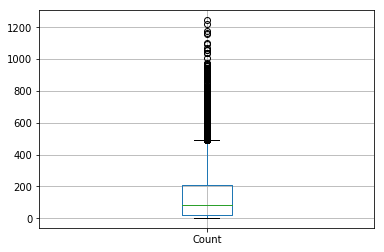

In [9]:
train.boxplot()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f62fe4c2ef0>]],
      dtype=object)

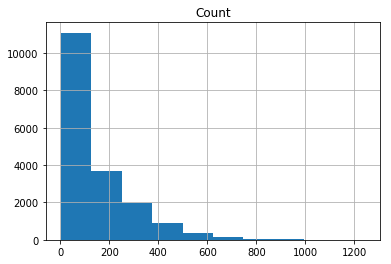

In [10]:
train.hist()

<Figure size 1800x720 with 0 Axes>

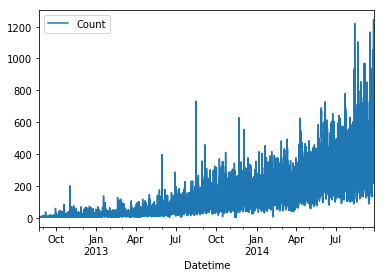

In [45]:
import matplotlib.pyplot as plt

train['Datetime'] =pd.to_datetime(train['Datetime'], format='%d-%m-%Y %H:%M')
train.sort_values(by='Datetime', inplace=True, ascending=True)
train.set_index('Datetime',inplace=True)

train.plot()


#plt.plot(train['Datetime'], train['Count'])
#plt.scatter(train['Datetime'], train['Count'])

In [0]:
test['Datetime'] =pd.to_datetime(test['Datetime'], format='%d-%m-%Y %H:%M')

test.sort_values(by='Datetime', ascending=True).head()

test.set_index('Datetime',inplace=True)

/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  % freq, ValueWarning)


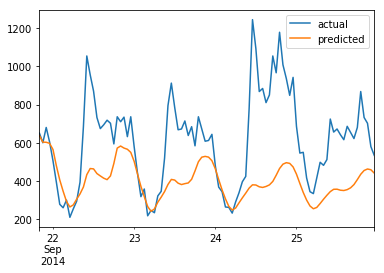

In [59]:
from statsmodels.tsa.ar_model import AR
train_data, valid_data = train[1:len(train)-100], train[len(train)-100:]
ar = AR(train_data).fit()
pred = ar.predict(start=len(train_data),end=len(train_data)+len(valid_data)-1)

# create a comparison dataframe
compare_df = pd.concat(
    [train['Count'].tail(100),
    pred], axis=1).rename(
    columns={'Count': 'actual', 0:'predicted'})
 
#plot the two values
compare_df.plot()